In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import random
import torch
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [22]:
#dimenion
d = 20
#initialize
xinitial = torch.rand(d,1)*6-3
print(xinitial.dtype)
#kernel sigma
sigma=2

# print(xinitial)
# print(xinitial.var())

torch.float32


In [23]:
def targetfunc(x,B):
    return (x-B)**2-10*torch.cos(2*np.pi*(x-B))+10

In [24]:
#Rastrigin function
def L(x, d, B, C):
    sum=torch.sum((x-B)**2-10*torch.cos(2*np.pi*(x-B))+10)/d+C
    return sum

def dL(x, d, B):
    delta=(2.*(x-B)+10.*torch.sin(2.*np.pi*(x-B))*2*np.pi)/d
    # delta=delta/torch.norm(delta)
    return delta

In [25]:
def kernel(x,sigma):
    return torch.exp(-(x-x.t())**2/(2*sigma))

In [26]:
def dL_kernel(x, d, B, sigma):
    delta=torch.mm(kernel(x,sigma),(2*(x-B)+10*torch.sin(2*np.pi*(x-B))*2*np.pi)/d)/d
    # delta=delta/torch.norm(delta)
    return delta

In [27]:
#gd
def gd(xinitial, B, C, step_num, dt):
    L_step = [0 for n in range(step_num)]
    x_step = xinitial
    L_step[0] = L(xinitial, d, B, C)
    traj_x=xinitial
    for step in range(step_num - 1):
        x_step_new=x_step-dt*dL(x_step,d,B)
        L_step[step + 1] = L(x_step_new, d, B, C)
        x_step = x_step_new
        traj_x=torch.cat((traj_x,x_step),1)
        #print(L_step[step])
    return L_step, x_step,traj_x

#gd with noise
def gd_noise(xinitial, B, C, step_num, dt, sigma):
    L_step = [0 for n in range(step_num)]
    x_step = xinitial
    L_step[0] = L(xinitial, d, B, C)
    traj_x=xinitial
    for step in range(step_num - 1):
        V=targetfunc(x_step,B)
        zerotensor=torch.zeros(d,1)
        x_step_new = x_step-dt*dL(x_step,d,B)+torch.from_numpy(np.random.normal(0,dt,(d,1)))*(torch.max((V-torch.mean(V)).float(),zerotensor.float()))
        L_step[step + 1] = L(x_step_new, d, B, C)
        x_step = x_step_new
        traj_x=torch.cat(((traj_x).float(),(x_step).float()),1)
    return L_step, x_step,traj_x

In [28]:
dt = 0.005
B = 0
C = 0
step_num = 2000
L_step, x_final,traj_x = gd(xinitial, B, C, step_num, dt)
print(torch.mean(x_final))
L_step_noise, x_final_noise,traj_x_noise = gd_noise(xinitial, B, C, step_num, dt, sigma)
print(torch.mean(x_final_noise))

tensor(-0.2985)
tensor(-0.2209, dtype=torch.float64)


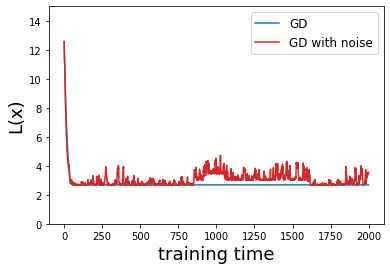

In [29]:
#plot gd history and gd_kenel history
fig, ax1 = plt.subplots()
ax1.set_ylabel("L(x)", fontsize=18)
ax1.set_xlabel("training time", fontsize=18)
ax1.plot(L_step, label="GD")
ax1.plot(L_step_noise, label="GD with noise",color = colors[3])
ax1.legend(fontsize=12)
ax1.set_ylim(0,15)
plt.show()

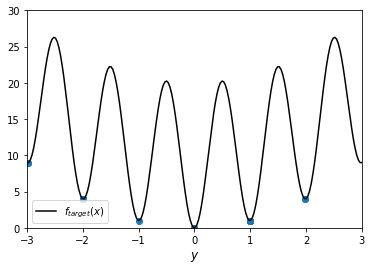

In [30]:

fig, ax1 = plt.subplots()
ax1.set_xlabel(r"$y$", fontsize=12)
ax1.set_xlim(-3,3)
ax1.set_ylim(0,30)
xs = torch.linspace(-3,3,200).reshape(200,1)
ax1.plot(xs.numpy(), targetfunc(xs,B).numpy(), "k", label=r"$f_{target}(x)$")
x_time=traj_x[:,1000]
ax1.scatter(x_time.numpy(), targetfunc(x_time,B).numpy())
plt.legend()
    
